### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. Cleaning Data
#### 3. Create a 70/30 sample for Tableau
#### 4. K-means and elbow technique
#### 5. Applying PCA in 2 dimensions

### Importing libraries and data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pylab as pl
import warnings
warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [2]:
# Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Real Estate Price Prediction'

In [3]:
#Import RDC_Inventory_Core_Metrics_Zip_History.csv
df_inventory_by_month=pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'RDC_Inventory_Core_Metrics_Zip_History_3-9-24.csv'))

In [4]:
df_inventory_by_month.head()

,month_date_yyyymm,postal_code,zip_name,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202402,72680,"timbo, ar",350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,...,445000.0,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0
1,202402,53037,"jackson, wi",429900.0,0.0000,-0.0283,40.0,0.0822,0.2951,30.0,...,440544.0,0.0082,0.0240,66.0,0.1909,1.0469,0.6582,0.1377,0.4287,1.0
2,202402,2885,"warren, ri",471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,...,579868.0,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0
3,202402,52765,"new liberty, ia",559500.0,0.0000,1.2163,0.0,-1.0000,-1.0000,91.0,...,559500.0,0.0000,1.2163,1.0,0.0000,0.0000,NaN,NaN,NaN,1.0
4,202402,47969,"newtown, in",135000.0,NaN,-0.0288,0.0,NaN,-1.0000,133.0,...,135000.0,NaN,-0.0288,1.0,-0.5000,-0.5000,NaN,NaN,NaN,1.0


In [5]:
df_inventory_by_month.shape

(2681926, 40)

In [6]:
df_inventory_by_month.dtypes

month_date_yyyymm                           object
postal_code                                 object
zip_name                                    object
median_listing_price                       float64
median_listing_price_mm                    float64
median_listing_price_yy                    float64
active_listing_count                       float64
active_listing_count_mm                    float64
active_listing_count_yy                    float64
median_days_on_market                      float64
median_days_on_market_mm                   float64
median_days_on_market_yy                   float64
new_listing_count                          float64
new_listing_count_mm                       float64
new_listing_count_yy                       float64
price_increased_count                      float64
price_increased_count_mm                   float64
price_increased_count_yy                   float64
price_reduced_count                        float64
price_reduced_count_mm         

## 2. Cleaning Data

In [7]:
# Rename postal_code to zipcode
df_inventory_by_month.rename(columns = {'postal_code' : 'zip_code'}, inplace = True)

In [8]:
# Rename month_date_yyyymm to yyyy_mm
df_inventory_by_month.rename(columns = {'month_date_yyyymm' : 'yyyy_mm'}, inplace = True)

In [9]:
# Rename zip_name to city_state
df_inventory_by_month.rename(columns = {'zip_name' : 'city_state'}, inplace = True)

In [10]:
df_inventory_by_month.head()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202402,72680,"timbo, ar",350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,...,445000.0,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0
1,202402,53037,"jackson, wi",429900.0,0.0000,-0.0283,40.0,0.0822,0.2951,30.0,...,440544.0,0.0082,0.0240,66.0,0.1909,1.0469,0.6582,0.1377,0.4287,1.0
2,202402,2885,"warren, ri",471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,...,579868.0,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0
3,202402,52765,"new liberty, ia",559500.0,0.0000,1.2163,0.0,-1.0000,-1.0000,91.0,...,559500.0,0.0000,1.2163,1.0,0.0000,0.0000,NaN,NaN,NaN,1.0
4,202402,47969,"newtown, in",135000.0,NaN,-0.0288,0.0,NaN,-1.0000,133.0,...,135000.0,NaN,-0.0288,1.0,-0.5000,-0.5000,NaN,NaN,NaN,1.0


In [11]:
# Check for missing values
df_inventory_by_month.isnull().sum()

yyyy_mm                                          0
zip_code                                         0
city_state                                   62850
median_listing_price                          7758
median_listing_price_mm                     414213
median_listing_price_yy                     495571
active_listing_count                          5175
active_listing_count_mm                     424417
active_listing_count_yy                     509759
median_days_on_market                        28642
median_days_on_market_mm                    435009
median_days_on_market_yy                    522425
new_listing_count                             3340
new_listing_count_mm                       1259305
new_listing_count_yy                       1261355
price_increased_count                         3340
price_increased_count_mm                   2421096
price_increased_count_yy                   2397942
price_reduced_count                           3340
price_reduced_count_mm         

In [12]:
df_inventory_by_month.dtypes

yyyy_mm                                     object
zip_code                                    object
city_state                                  object
median_listing_price                       float64
median_listing_price_mm                    float64
median_listing_price_yy                    float64
active_listing_count                       float64
active_listing_count_mm                    float64
active_listing_count_yy                    float64
median_days_on_market                      float64
median_days_on_market_mm                   float64
median_days_on_market_yy                   float64
new_listing_count                          float64
new_listing_count_mm                       float64
new_listing_count_yy                       float64
price_increased_count                      float64
price_increased_count_mm                   float64
price_increased_count_yy                   float64
price_reduced_count                        float64
price_reduced_count_mm         

In [13]:
df_inventory_by_month.tail()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
2681921,201607,27858,"greenville, nc",182000.0,NaN,NaN,240.0,NaN,NaN,78.0,...,222008.0,NaN,NaN,368.0,NaN,NaN,0.5333,NaN,NaN,NaN
2681922,201607,44609,"beloit, oh",105000.0,NaN,NaN,10.0,NaN,NaN,82.0,...,114127.0,NaN,NaN,10.0,NaN,NaN,0.0000,NaN,NaN,NaN
2681923,201607,59540,"rudyard, mt",80000.0,NaN,NaN,1.0,NaN,NaN,7.0,...,80000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2681924,201607,37037,"christiana, tn",237700.0,NaN,NaN,69.0,NaN,NaN,50.0,...,297439.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN
2681925,quality_flag = 1: year-over-year figures may ...,please contact economics@realtor.com for more...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_inventory_by_month = df_inventory_by_month.drop([2681925])

In [15]:
df_inventory_by_month.tail()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
2681920,201607,46157,"monrovia, in",158500.0,NaN,NaN,17.0,NaN,NaN,81.0,...,231721.0,NaN,NaN,25.0,NaN,NaN,0.4706,NaN,NaN,NaN
2681921,201607,27858,"greenville, nc",182000.0,NaN,NaN,240.0,NaN,NaN,78.0,...,222008.0,NaN,NaN,368.0,NaN,NaN,0.5333,NaN,NaN,NaN
2681922,201607,44609,"beloit, oh",105000.0,NaN,NaN,10.0,NaN,NaN,82.0,...,114127.0,NaN,NaN,10.0,NaN,NaN,0.0000,NaN,NaN,NaN
2681923,201607,59540,"rudyard, mt",80000.0,NaN,NaN,1.0,NaN,NaN,7.0,...,80000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2681924,201607,37037,"christiana, tn",237700.0,NaN,NaN,69.0,NaN,NaN,50.0,...,297439.0,NaN,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# column to list using Series.tolist()
zip_code_list = df_inventory_by_month['zip_code'].tolist()
 
print('Converting zip_code to list:')
 
# displaying list
zip_code_list

Converting zip_code to list:


[72680,
 53037,
 2885,
 52765,
 47969,
 92401,
 79853,
 87061,
 16912,
 15401,
 48856,
 63534,
 14533,
 59024,
 57375,
 45630,
 49459,
 12760,
 55917,
 93283,
 79851,
 78521,
 63463,
 49428,
 11738,
 30083,
 20184,
 64456,
 19970,
 35244,
 34109,
 28704,
 34139,
 43143,
 64486,
 84001,
 53204,
 19601,
 13036,
 97239,
 76053,
 93218,
 16345,
 29368,
 91206,
 8043,
 66510,
 83250,
 87824,
 13322,
 67572,
 13682,
 93550,
 56467,
 35043,
 38017,
 28379,
 3260,
 99921,
 61537,
 74421,
 31025,
 92124,
 80758,
 24176,
 48462,
 40508,
 55013,
 52205,
 29924,
 67137,
 24315,
 60103,
 75565,
 31624,
 43948,
 57105,
 3868,
 12816,
 55344,
 22821,
 73853,
 35117,
 12202,
 64841,
 75709,
 41810,
 56016,
 49825,
 67838,
 97065,
 42166,
 66097,
 47564,
 24230,
 39837,
 73112,
 29702,
 65746,
 72655,
 67056,
 17547,
 2632,
 12309,
 37398,
 7108,
 19706,
 97434,
 71406,
 87061,
 72427,
 56235,
 31561,
 87939,
 76131,
 87749,
 67017,
 65233,
 36912,
 62815,
 38859,
 68958,
 87749,
 79836,
 2648,
 81232,

In [17]:
# Change data type on column zip_code from an object to a string 
df_inventory_by_month['zip_code'] = df_inventory_by_month['zip_code'].astype('str')

In [18]:
# Change data type on column yyyy_mm from an object to a string 
df_inventory_by_month['yyyy_mm'] = df_inventory_by_month['yyyy_mm'].astype('str')

In [19]:
# Change data type on column city_state from an object to a string 
df_inventory_by_month['city_state'] = df_inventory_by_month['city_state'].astype('str')

In [20]:
df_inventory_by_month.dtypes

yyyy_mm                                     object
zip_code                                    object
city_state                                  object
median_listing_price                       float64
median_listing_price_mm                    float64
median_listing_price_yy                    float64
active_listing_count                       float64
active_listing_count_mm                    float64
active_listing_count_yy                    float64
median_days_on_market                      float64
median_days_on_market_mm                   float64
median_days_on_market_yy                   float64
new_listing_count                          float64
new_listing_count_mm                       float64
new_listing_count_yy                       float64
price_increased_count                      float64
price_increased_count_mm                   float64
price_increased_count_yy                   float64
price_reduced_count                        float64
price_reduced_count_mm         

In [21]:
# Add a 0 to front of 4 digit zip codes
df_inventory_by_month['zip_code'] = df_inventory_by_month['zip_code'].apply(lambda x: x.zfill(5) if len(x) < 5 else x)

In [22]:
# column to list using Series.tolist()
zip_code_list = df_inventory_by_month['zip_code'].tolist()
 
print('Converting zip_code to list:')
 
# displaying list
zip_code_list

Converting zip_code to list:


['72680',
 '53037',
 '02885',
 '52765',
 '47969',
 '92401',
 '79853',
 '87061',
 '16912',
 '15401',
 '48856',
 '63534',
 '14533',
 '59024',
 '57375',
 '45630',
 '49459',
 '12760',
 '55917',
 '93283',
 '79851',
 '78521',
 '63463',
 '49428',
 '11738',
 '30083',
 '20184',
 '64456',
 '19970',
 '35244',
 '34109',
 '28704',
 '34139',
 '43143',
 '64486',
 '84001',
 '53204',
 '19601',
 '13036',
 '97239',
 '76053',
 '93218',
 '16345',
 '29368',
 '91206',
 '08043',
 '66510',
 '83250',
 '87824',
 '13322',
 '67572',
 '13682',
 '93550',
 '56467',
 '35043',
 '38017',
 '28379',
 '03260',
 '99921',
 '61537',
 '74421',
 '31025',
 '92124',
 '80758',
 '24176',
 '48462',
 '40508',
 '55013',
 '52205',
 '29924',
 '67137',
 '24315',
 '60103',
 '75565',
 '31624',
 '43948',
 '57105',
 '03868',
 '12816',
 '55344',
 '22821',
 '73853',
 '35117',
 '12202',
 '64841',
 '75709',
 '41810',
 '56016',
 '49825',
 '67838',
 '97065',
 '42166',
 '66097',
 '47564',
 '24230',
 '39837',
 '73112',
 '29702',
 '65746',
 '72655',


In [23]:
# Check for missing values
df_inventory_by_month.isnull().sum()

yyyy_mm                                          0
zip_code                                         0
city_state                                       0
median_listing_price                          7757
median_listing_price_mm                     414212
median_listing_price_yy                     495570
active_listing_count                          5174
active_listing_count_mm                     424416
active_listing_count_yy                     509758
median_days_on_market                        28641
median_days_on_market_mm                    435008
median_days_on_market_yy                    522424
new_listing_count                             3339
new_listing_count_mm                       1259304
new_listing_count_yy                       1261354
price_increased_count                         3339
price_increased_count_mm                   2421095
price_increased_count_yy                   2397941
price_reduced_count                           3339
price_reduced_count_mm         

In [24]:
#Export my new dataframe as a csv for Tableau
df_inventory_by_month.to_csv(os.path.join(path, '02 Data','Prepared Data', 'RDC_complete_data.csv'))

In [25]:
df_inventory_by_month.shape

(2681925, 40)

In [26]:
# column to list using Series.tolist()
median_listing_price_list = df_inventory_by_month['median_listing_price'].tolist()
 
print('Converting median_listing_price to list:')
 
# displaying list
median_listing_price_list

Converting median_listing_price to list:


[350000.0,
 429900.0,
 471243.0,
 559500.0,
 135000.0,
 255722.0,
 260000.0,
 469500.0,
 149900.0,
 119700.0,
 340900.0,
 74000.0,
 206425.0,
 124900.0,
 249900.0,
 84900.0,
 179900.0,
 399000.0,
 167400.0,
 205000.0,
 180000.0,
 237425.0,
 677500.0,
 414900.0,
 544500.0,
 263000.0,
 2799999.0,
 174900.0,
 597225.0,
 582500.0,
 722175.0,
 695000.0,
 401750.0,
 360725.0,
 2459250.0,
 482000.0,
 176250.0,
 179900.0,
 247200.0,
 587500.0,
 305723.0,
 140000.0,
 424950.0,
 70000.0,
 949500.0,
 518200.0,
 1198000.0,
 378000.0,
 430000.0,
 427450.0,
 47500.0,
 399995.0,
 460000.0,
 449950.0,
 436000.0,
 649950.0,
 220000.0,
 199000.0,
 350000.0,
 119250.0,
 235425.0,
 567450.0,
 793225.0,
 349900.0,
 1800000.0,
 481175.0,
 264500.0,
 495000.0,
 237375.0,
 287500.0,
 29900.0,
 242500.0,
 385750.0,
 89900.0,
 254000.0,
 50000.0,
 309925.0,
 549999.0,
 300500.0,
 397350.0,
 315000.0,
 240000.0,
 309925.0,
 158675.0,
 289262.0,
 641225.0,
 39700.0,
 500000.0,
 130000.0,
 188650.0,
 199900.0,
 33

In [27]:
# column to list using Series.tolist()
quality_flag_list = df_inventory_by_month['quality_flag'].tolist()
 
print('Converting quality_flag to list:')
 
# displaying list
quality_flag_list

Converting quality_flag to list:


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0

In [28]:
# View missing values in df_inventory_by_month                      
df_nan = df_inventory_by_month[df_inventory_by_month['quality_flag'].isnull()==True]

In [29]:
df_nan

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
2331169,201706,37322,"decatur, tn",202475.0,NaN,NaN,36.0,NaN,NaN,76.0,...,289584.0,NaN,NaN,42.0,NaN,NaN,0.1549,NaN,NaN,NaN
2331170,201706,15661,"loyalhanna, pa",90000.0,NaN,NaN,1.0,NaN,NaN,51.0,...,90000.0,NaN,NaN,2.0,NaN,NaN,1.5000,NaN,NaN,NaN
2331171,201706,03884,"strafford, nh",322425.0,NaN,NaN,22.0,NaN,NaN,41.0,...,365574.0,NaN,NaN,30.0,NaN,NaN,0.3721,NaN,NaN,NaN
2331172,201706,47020,"florence, in",153000.0,NaN,NaN,5.0,NaN,NaN,34.0,...,216305.0,NaN,NaN,5.0,NaN,NaN,0.2222,NaN,NaN,NaN
2331173,201706,24597,"vernon hill, va",90700.0,NaN,NaN,4.0,NaN,NaN,73.0,...,85975.0,NaN,NaN,6.0,NaN,NaN,0.3750,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681920,201607,46157,"monrovia, in",158500.0,NaN,NaN,17.0,NaN,NaN,81.0,...,231721.0,NaN,NaN,25.0,NaN,NaN,0.4706,NaN,NaN,NaN
2681921,201607,27858,"greenville, nc",182000.0,NaN,NaN,240.0,NaN,NaN,78.0,...,222008.0,NaN,NaN,368.0,NaN,NaN,0.5333,NaN,NaN,NaN
2681922,201607,44609,"beloit, oh",105000.0,NaN,NaN,10.0,NaN,NaN,82.0,...,114127.0,NaN,NaN,10.0,NaN,NaN,0.0000,NaN,NaN,NaN
2681923,201607,59540,"rudyard, mt",80000.0,NaN,NaN,1.0,NaN,NaN,7.0,...,80000.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Check the max

df_inventory_by_month['median_listing_price'].max()

279000000.0

In [31]:
# Sort housing datat by median_listing_price
sorted_data = df_inventory_by_month.sort_values(by='median_listing_price')

In [32]:
# Get top ten most affordable zip codes
top_ten_affordable = sorted_data.head(10)

print(top_ten_affordable)

        yyyy_mm zip_code        city_state  median_listing_price  \
93328    202311    44659   mount eaton, oh                   1.0   
890709   202107    44689        wilmot, oh                   1.0   
828011   202109    45695   wilkesville, oh                   1.0   
1465937  201911    68404       martell, ne                   1.0   
676996   202202    61519        bryant, il                   1.0   
1809203  201812    47995       wolcott, in                   1.0   
238797   202306    45734    graysville, oh                   1.0   
256017   202305    62672       nilwood, il                   1.0   
988370   202103    45168  russellville, oh                   1.0   
626860   202204    26160     palestine, wv                   1.0   

         median_listing_price_mm  median_listing_price_yy  \
93328                        NaN                      NaN   
890709                       NaN                      0.0   
828011                       0.0                     -1.0   
1465937

In [33]:
# Sort data by housing prices in descending order
sorted_data_2 = df_inventory_by_month.sort_values(by='median_listing_price', ascending=False)

In [34]:
# Get top ten least affordable zip codes
top_ten_least_affordable = sorted_data_2.head(50)

print(top_ten_least_affordable)

        yyyy_mm zip_code            city_state  median_listing_price  \
1558076  201909    81522           gateway, co           279000000.0   
1628146  201906    81522           gateway, co           279000000.0   
1527466  201910    81522           gateway, co           279000000.0   
1445151  201912    81522           gateway, co           279000000.0   
1577267  201908    81522           gateway, co           279000000.0   
1612496  201907    81522           gateway, co           279000000.0   
1468508  201911    81522           gateway, co           279000000.0   
2297552  201708    81522           gateway, co           149000000.0   
2210691  201711    81522           gateway, co           149000000.0   
2262405  201709    81522           gateway, co           149000000.0   
2158936  201712    81522           gateway, co           149000000.0   
2081737  201803    81522           gateway, co           149000000.0   
2150888  201801    81522           gateway, co           1490000

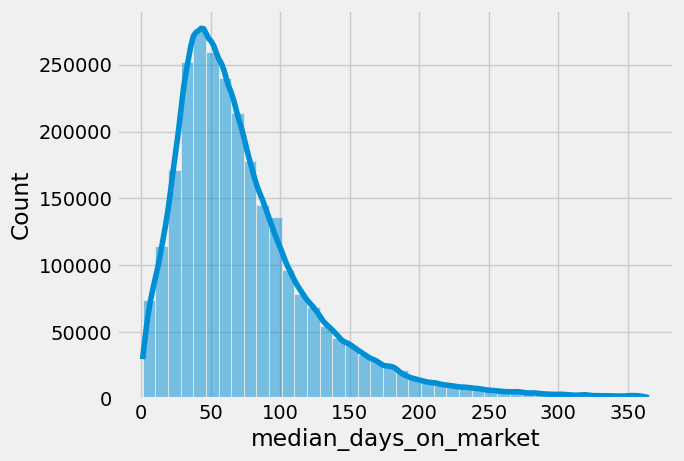

In [35]:
# Use a histogram to visualize the distribution of the variables. 

hist = sns.histplot(df_inventory_by_month['median_days_on_market'], bins = 40, kde = True)

In [36]:
df_inventory_by_month.loc[df_inventory_by_month['median_days_on_market'] < 20, 'days_on_market_category'] = 'low_days_on_market'

In [37]:
df_inventory_by_month.loc[(df_inventory_by_month['median_days_on_market'] >= 20) & (df_inventory_by_month['median_days_on_market'] < 50), 'days_on_market_category'] = 'medium_days_on_market'

In [38]:
df_inventory_by_month.loc[df_inventory_by_month['median_days_on_market'] >= 50, 'days_on_market_category'] = 'high_days_on_market'

In [39]:
df_inventory_by_month['days_on_market_category'].value_counts(dropna = False)

days_on_market_category
high_days_on_market      1682696
medium_days_on_market     782603
low_days_on_market        187985
nan                        28641
Name: count, dtype: int64

In [40]:
df_inventory_by_month.head()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,days_on_market_category
0,202402,72680,"timbo, ar",350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,...,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0,medium_days_on_market
1,202402,53037,"jackson, wi",429900.0,0.0000,-0.0283,40.0,0.0822,0.2951,30.0,...,0.0082,0.0240,66.0,0.1909,1.0469,0.6582,0.1377,0.4287,1.0,medium_days_on_market
2,202402,02885,"warren, ri",471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,...,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0,medium_days_on_market
3,202402,52765,"new liberty, ia",559500.0,0.0000,1.2163,0.0,-1.0000,-1.0000,91.0,...,0.0000,1.2163,1.0,0.0000,0.0000,NaN,NaN,NaN,1.0,high_days_on_market
4,202402,47969,"newtown, in",135000.0,NaN,-0.0288,0.0,NaN,-1.0000,133.0,...,NaN,-0.0288,1.0,-0.5000,-0.5000,NaN,NaN,NaN,1.0,high_days_on_market


In [41]:
#Export the updated dataframe as a csv for Tableau
df_inventory_by_month.to_csv(os.path.join(path, '02 Data','Prepared Data', 'RDC_complete_data_2.csv'))

In [42]:
# Select only entries with a non-zero rating

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['total_listing_count'] >= 1]

In [43]:
df_inventory_by_month.shape

(2667835, 41)

In [44]:
# Clean extreme values

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['median_square_feet'] < 10000] 
# 10000 was picked because https://www.visualcapitalist.com/cp/median-home-size-every-american-state-2022/ shows that Utah has the largest median home SF at 2,800SF - 10,000 is more that triple that figure to account for areas with a lot of mansions.

In [45]:
# Clean extreme values

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['median_listing_price'] < 2200000] 
# 2200000 was picked because as of December 2020 the article https://www.visualcapitalist.com/most-valuable-real-estate-cities-us/ the max medium home in San Jose, California was $1,100,000. Therefore, I chose to double that figure $2,200,000 as a cap to allow for increase in home prices over the last few years. It is also hard to believe that the medium home value for any city is over $2,200,000.

In [46]:
# Clean extreme values

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['median_listing_price'] >= 1000] 
# 100 was picked because as of February 2023 the article https://www.bankrate.com/real-estate/10-cheap-cities-to-buy-a-home/ the cheapest housing market was Youngstown, OH  with a medium home value of $149,900. I chose $1,000 to account for trailor homes, short sales, auctions, etc.

In [47]:
# Clean extreme values

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['median_listing_price_per_square_foot'] < 30000] 
# 30000 was picked because https://homebay.com/price-per-square-foot-2023/ says that the most expensive ZIP code by price per square foot is Point Reyes Station, California at $20,677, so I added additional $ account for price increases and genuine outliers. 

In [48]:
# Select only entries with a non-zero rating

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['median_listing_price_per_square_foot'] >= 1]

In [49]:
# Clean extreme values

df_inventory_by_month = df_inventory_by_month[df_inventory_by_month['average_listing_price'] < 3200000] 
# 3200000 was picked because I used 2200000 for the median list price, so I added 1000000 to the average list price.

In [50]:
df_inventory_by_month.shape

(2612065, 41)

In [51]:
#Export the updated dataframe as a csv for Tableau
df_inventory_by_month.to_csv(os.path.join(path, '02 Data','Prepared Data', 'RDC_complete_data_cleaned_extreme_values.csv'))

In [52]:
df_inventory_by_month.head()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,days_on_market_category
0,202402,72680,"timbo, ar",350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,...,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0,medium_days_on_market
1,202402,53037,"jackson, wi",429900.0,0.0000,-0.0283,40.0,0.0822,0.2951,30.0,...,0.0082,0.0240,66.0,0.1909,1.0469,0.6582,0.1377,0.4287,1.0,medium_days_on_market
2,202402,02885,"warren, ri",471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,...,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0,medium_days_on_market
3,202402,52765,"new liberty, ia",559500.0,0.0000,1.2163,0.0,-1.0000,-1.0000,91.0,...,0.0000,1.2163,1.0,0.0000,0.0000,NaN,NaN,NaN,1.0,high_days_on_market
4,202402,47969,"newtown, in",135000.0,NaN,-0.0288,0.0,NaN,-1.0000,133.0,...,NaN,-0.0288,1.0,-0.5000,-0.5000,NaN,NaN,NaN,1.0,high_days_on_market


In [53]:
df_inventory_by_month.describe()

,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
count,2.612065e+06,2.218117e+06,2.141946e+06,2.612065e+06,2.207113e+06,2.127040e+06,2.594151e+06,2.199655e+06,2.117718e+06,2.612065e+06,...,2.612065e+06,2.218117e+06,2.141946e+06,2.612065e+06,2.232972e+06,2.160751e+06,2.036582e+06,1.688996e+06,1.555133e+06,2.268649e+06
mean,3.261444e+05,8.032840e+00,1.568145e+01,3.151122e+01,2.660931e-02,7.495653e-02,7.483382e+01,2.404953e-01,5.247482e-01,1.404495e+01,...,3.912651e+05,7.453269e+00,1.481540e+01,4.657621e+01,2.809138e-02,8.475597e-02,7.730770e-01,1.399167e-02,7.086705e-02,5.513493e-01
std,2.767088e+05,1.413850e+03,2.977306e+03,5.757001e+01,3.642523e-01,8.877879e-01,5.284117e+01,1.803057e+00,4.701981e+00,2.369074e+01,...,3.599272e+05,1.391337e+03,2.947194e+03,7.925594e+01,3.190219e-01,8.262548e-01,9.080669e-01,6.867253e-01,1.051173e+00,4.973564e-01
min,1.000000e+03,-9.990000e-01,-9.998000e-01,0.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-9.973000e-01,-9.973000e-01,0.000000e+00,...,1.000000e+03,-9.998000e-01,-9.998000e-01,1.000000e+00,-9.643000e-01,-9.833000e-01,0.000000e+00,-6.904550e+01,-8.232610e+01,0.000000e+00
25%,1.494750e+05,-4.350000e-02,-8.320000e-02,3.000000e+00,-1.176000e-01,-3.750000e-01,3.900000e+01,-1.310000e-01,-3.431000e-01,0.000000e+00,...,1.709750e+05,-4.350000e-02,-9.320000e-02,4.000000e+00,-1.000000e-01,-2.941000e-01,2.381000e-01,-1.196000e-01,-1.911000e-01,0.000000e+00
50%,2.500000e+05,0.000000e+00,6.400000e-02,1.100000e+01,0.000000e+00,-8.590000e-02,6.200000e+01,1.077000e-01,-4.260000e-02,4.000000e+00,...,2.885870e+05,0.000000e+00,6.120000e-02,1.500000e+01,0.000000e+00,-5.880000e-02,5.000000e-01,0.000000e+00,2.630000e-02,1.000000e+00
75%,4.043910e+05,4.840000e-02,2.621000e-01,3.600000e+01,9.520000e-02,2.308000e-01,9.600000e+01,3.319000e-01,3.806000e-01,1.800000e+01,...,4.773890e+05,4.990000e-02,2.605000e-01,5.700000e+01,8.650000e-02,2.000000e-01,1.000000e+00,1.319000e-01,3.333000e-01,1.000000e+00
max,2.199999e+06,6.989990e+05,1.789999e+06,2.646000e+03,6.800000e+01,1.030000e+02,3.650000e+02,3.410000e+02,3.640000e+02,8.020000e+02,...,3.199993e+06,6.989990e+05,1.789999e+06,2.860000e+03,6.800000e+01,1.680000e+02,9.450000e+01,7.536840e+01,9.262890e+01,1.000000e+00


In [54]:
# Find the max value for the median_listing_price column
df_inventory_by_month['median_listing_price'].max()

2199999.0

In [55]:
# Find the min value for the median_listing_price column
df_inventory_by_month['median_listing_price'].min()

1000.0

## Create a 70/30 sample for Tableau

In [56]:
# Create the seed
np.random.seed(6)

In [57]:
# Create a list holding True/False values to test the np.random.rand () <= 0.7
dev = np.random.rand(len(df_inventory_by_month)) <= 0.7

In [58]:
dev

array([False,  True, False, ..., False, False, False])

In [59]:
np.random.rand(10)

array([0.92707568, 0.1578517 , 0.05862362, 0.19956824, 0.88658988,
       0.72234904, 0.11422156, 0.41856592, 0.02560151, 0.25383059])

In [60]:
# Store 70% of the sample in the dataframe big
big = df_inventory_by_month[dev]

In [61]:
# Store 30% of the sample in the dataframe small
small = df_inventory_by_month[~dev]

In [62]:
len(df_inventory_by_month)

2612065

In [63]:
len(big) + len(small)

2612065

In [64]:
df_small_inventory_by_month = small

In [65]:
df_small_inventory_by_month.head()

,yyyy_mm,zip_code,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag,days_on_market_category
0,202402,72680,"timbo, ar",350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,...,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0,medium_days_on_market
2,202402,02885,"warren, ri",471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,...,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0,medium_days_on_market
11,202402,63534,"callao, mo",74000.0,0.0000,-0.5806,3.0,0.0000,0.5000,79.0,...,0.0000,-0.5733,3.0,0.0000,0.2000,NaN,NaN,NaN,1.0,high_days_on_market
15,202402,45630,"friendship, oh",84900.0,0.0000,NaN,1.0,0.0000,NaN,120.0,...,0.0000,NaN,1.0,0.0000,0.0000,1.0000,NaN,NaN,0.0,high_days_on_market
16,202402,49459,"walkerville, mi",179900.0,0.0000,-0.3211,3.0,0.0000,0.0000,117.0,...,0.0000,0.2601,3.0,0.0000,-0.4000,NaN,NaN,NaN,1.0,high_days_on_market


In [66]:
df_small_inventory_by_month.shape

(783842, 41)

In [67]:
#Export the 30% sample dataframe as a csv for Tableau
df_small_inventory_by_month.to_csv(os.path.join(path, '02 Data','Prepared Data', 'RDC_small_sample.csv'))

# K-means and elbow technique

In [68]:
### Permanantly dropping categorical columns from the dataframe to run k-means
kmeans_df= df_small_inventory_by_month.drop(columns = [ 'yyyy_mm', 'zip_code', 'city_state', 'days_on_market_category'])

In [69]:
kmeans_df.head()

,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,median_days_on_market_mm,median_days_on_market_yy,new_listing_count,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,350000.0,-0.3519,-0.3548,4.0,1.0000,1.0000,20.0,-0.8520,-0.8682,2.0,...,445000.0,-0.1759,-0.1797,4.0,0.3333,0.3333,NaN,NaN,NaN,1.0
2,471243.0,0.0246,-0.0518,7.0,-0.1333,-0.3158,41.0,1.4118,-0.5367,0.0,...,579868.0,0.1250,0.1597,17.0,-0.1282,-0.3200,1.6154,-0.0513,-0.2267,1.0
11,74000.0,0.0000,-0.5806,3.0,0.0000,0.5000,79.0,0.5545,-0.3431,0.0,...,75300.0,0.0000,-0.5733,3.0,0.0000,0.2000,NaN,NaN,NaN,1.0
15,84900.0,0.0000,NaN,1.0,0.0000,NaN,120.0,0.2132,NaN,0.0,...,84900.0,0.0000,NaN,1.0,0.0000,0.0000,1.0000,NaN,NaN,0.0
16,179900.0,0.0000,-0.3211,3.0,0.0000,0.0000,117.0,0.3164,1.9682,0.0,...,426300.0,0.0000,0.2601,3.0,0.0000,-0.4000,NaN,NaN,NaN,1.0


In [70]:
kmeans_df.shape

(783842, 37)

In [75]:
# Check for missing values

kmeans_df.isnull().sum()

median_listing_price                            0
median_listing_price_mm                    118144
median_listing_price_yy                    140827
active_listing_count                            0
active_listing_count_mm                    121377
active_listing_count_yy                    145353
median_days_on_market                        5339
median_days_on_market_mm                   123523
median_days_on_market_yy                   148039
new_listing_count                               0
new_listing_count_mm                       362281
new_listing_count_yy                       362928
price_increased_count                           0
price_increased_count_mm                   706393
price_increased_count_yy                   699297
price_reduced_count                             0
price_reduced_count_mm                     442830
price_reduced_count_yy                     436509
pending_listing_count                      165518
pending_listing_count_mm                   270971


In [76]:
### Permanantly dropping unnecessary columns from the dataframe
kmeans_df = kmeans_df.drop(columns = [ 'median_listing_price_mm', 'median_listing_price_yy', 'active_listing_count_mm', 'active_listing_count_yy', 'median_days_on_market_mm', 'median_days_on_market_yy', 'new_listing_count_mm', 'new_listing_count_yy', 'price_increased_count_mm', 'price_increased_count_yy', 'price_reduced_count_mm', 'price_reduced_count_yy', 'pending_listing_count_mm', 'pending_listing_count_yy', 'median_listing_price_per_square_foot_mm', 'median_listing_price_per_square_foot_yy', 'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio', 'pending_ratio_mm', 'pending_ratio_yy', 'quality_flag'])

In [77]:
# Check for missing values

kmeans_df.isnull().sum()

median_listing_price                         0
active_listing_count                         0
median_days_on_market                     5339
new_listing_count                            0
price_increased_count                        0
price_reduced_count                          0
pending_listing_count                   165518
median_listing_price_per_square_foot         0
median_square_feet                           0
average_listing_price                        0
total_listing_count                          0
dtype: int64

In [78]:
#View missing values in median_days_on_market                      
df_nan = kmeans_df[kmeans_df['median_days_on_market'].isnull()==True]

In [79]:
df_nan

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
215,232000.0,1.0,NaN,0.0,0.0,0.0,NaN,129.0,1792.0,232000.0,1.0
703,99900.0,0.0,NaN,0.0,0.0,0.0,1.0,105.0,952.0,99900.0,1.0
3083,270000.0,1.0,NaN,4.0,0.0,0.0,NaN,162.0,1670.0,270000.0,1.0
3098,450000.0,1.0,NaN,0.0,0.0,0.0,1.0,246.0,1830.0,450000.0,1.0
4152,489000.0,1.0,NaN,0.0,0.0,0.0,1.0,171.0,2862.0,489000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2680684,387277.0,1.0,NaN,0.0,0.0,0.0,NaN,175.0,2209.0,387277.0,1.0
2680695,50000.0,1.0,NaN,4.0,0.0,0.0,NaN,33.0,1519.0,50000.0,1.0
2681437,125000.0,1.0,NaN,0.0,0.0,0.0,NaN,89.0,1408.0,125000.0,1.0
2681451,100000.0,1.0,NaN,0.0,0.0,0.0,NaN,69.0,1459.0,100000.0,1.0


In [80]:
# Find the median value for the median_days_on_market column
kmeans_df['median_days_on_market'].median()

62.0

In [81]:
#Replace missing values in the median_days_on_market column with the median value                    
kmeans_df['median_days_on_market'].fillna(62.0, inplace = True)

In [82]:
#View missing values in pending_listing_count                      
df_nan_1 = kmeans_df[kmeans_df['pending_listing_count'].isnull()==True]

In [83]:
df_nan_1

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,350000.0,4.0,20.0,2.0,0.0,0.0,NaN,181.0,1516.0,445000.0,4.0
11,74000.0,3.0,79.0,0.0,0.0,0.0,NaN,63.0,1732.0,75300.0,3.0
16,179900.0,3.0,117.0,0.0,0.0,0.0,NaN,138.0,1300.0,426300.0,3.0
19,205000.0,4.0,81.0,2.0,0.0,0.0,NaN,262.0,1198.0,292183.0,4.0
22,677500.0,2.0,99.0,0.0,0.0,0.0,NaN,139.0,864.0,677500.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2681887,564900.0,1.0,190.0,0.0,0.0,0.0,NaN,266.0,2125.0,564900.0,1.0
2681903,111450.0,2.0,112.0,0.0,0.0,0.0,NaN,61.0,1840.0,111450.0,2.0
2681918,189000.0,5.0,33.0,8.0,0.0,4.0,NaN,76.0,2476.0,248113.0,5.0
2681923,80000.0,1.0,7.0,2.0,0.0,0.0,NaN,35.0,2283.0,80000.0,1.0


In [84]:
# Find the mean value for the pending_listing_count column
kmeans_df['pending_listing_count'].mean()

19.409963061437047

In [85]:
#Replace missing values in the pending_listing_count column with the mean value                    
kmeans_df['pending_listing_count'].fillna(19.931140407971498, inplace = True)

In [86]:
# Check for missing values

kmeans_df.isnull().sum()

median_listing_price                    0
active_listing_count                    0
median_days_on_market                   0
new_listing_count                       0
price_increased_count                   0
price_reduced_count                     0
pending_listing_count                   0
median_listing_price_per_square_foot    0
median_square_feet                      0
average_listing_price                   0
total_listing_count                     0
dtype: int64

In [87]:
kmeans_df.describe()

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
count,7.838420e+05,783842.000000,783842.000000,783842.000000,783842.000000,783842.000000,783842.000000,783842.000000,783842.000000,7.838420e+05,783842.000000
mean,3.262325e+05,31.533002,74.711432,14.043167,0.853601,8.405814,19.520016,169.771132,1935.876908,3.914930e+05,46.576006
std,2.767067e+05,57.885431,52.623298,23.680890,3.933901,18.526999,29.327326,171.799508,702.709235,3.598703e+05,79.403085
min,1.000000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+03,1.000000
25%,1.496500e+05,3.000000,39.000000,0.000000,0.000000,0.000000,2.000000,89.000000,1493.000000,1.713000e+05,4.000000
50%,2.500000e+05,11.000000,62.000000,4.000000,0.000000,2.000000,12.000000,134.000000,1811.000000,2.885940e+05,15.000000
75%,4.046750e+05,36.000000,95.000000,18.000000,0.000000,8.000000,19.931140,201.000000,2223.000000,4.778540e+05,57.000000
max,2.199800e+06,2646.000000,365.000000,412.000000,268.000000,568.000000,828.000000,29924.000000,9999.000000,3.199524e+06,2845.000000


In [88]:
kmeans_df.var()

median_listing_price                    7.656659e+10
active_listing_count                    3.350723e+03
median_days_on_market                   2.769211e+03
new_listing_count                       5.607845e+02
price_increased_count                   1.547558e+01
price_reduced_count                     3.432497e+02
pending_listing_count                   8.600920e+02
median_listing_price_per_square_foot    2.951507e+04
median_square_feet                      4.938003e+05
average_listing_price                   1.295067e+11
total_listing_count                     6.304850e+03
dtype: float64

In [89]:
x = kmeans_df

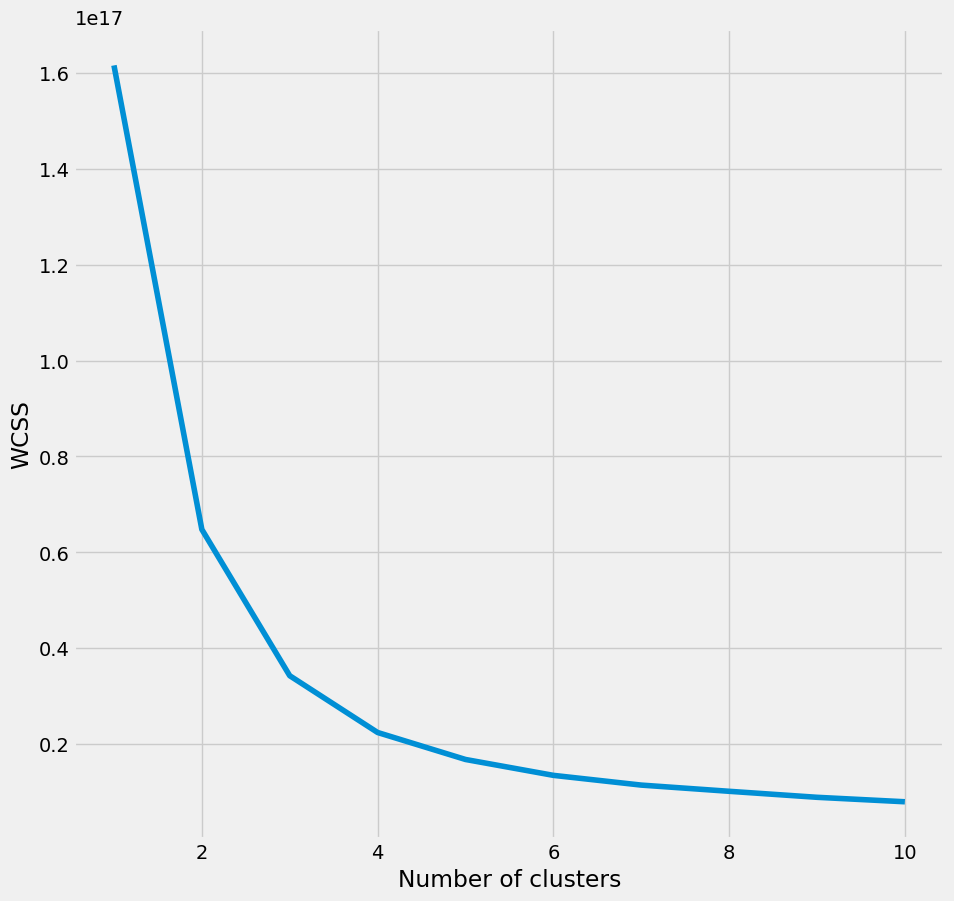

In [90]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = 'k-means++')
   model.fit(x)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### I will use 4 clusters as that is where the line becomes flatter. 

## Applying PCA in 2 dimensions

In [91]:
pca = PCA(2)
data = pca.fit_transform(x)

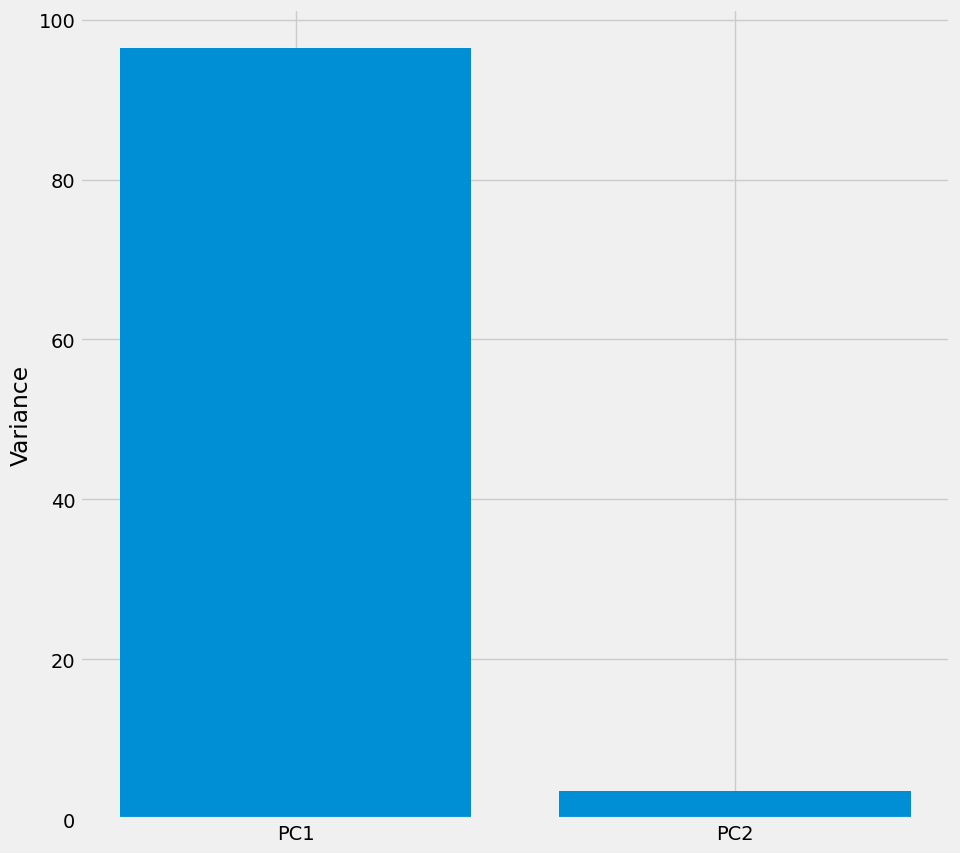

In [92]:
plt.figure(figsize=(10,10))
var = np.round(pca.explained_variance_ratio_*100, decimals = 1)
lbls = ['PC'+ str(x) for x in range(1,len(var)+1)]
plt.bar(x=range(1,len(var)+1), height = var, tick_label = lbls)
plt.ylabel('Variance')
plt.show()

#### Training the models with 4 clusters

In [93]:
model = KMeans(n_clusters = 4, init = 'k-means++')
label = model.fit_predict(data)
print(label)

[0 0 3 ... 3 3 3]


In [94]:
kmeans_df['clusters'] = model.fit_predict(data)

In [95]:
kmeans_df.head(10)

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,clusters
0,350000.0,4.0,20.0,2.0,0.0,0.0,19.93114,181.0,1516.0,445000.0,4.0,3
2,471243.0,7.0,41.0,0.0,0.0,0.0,11.00000,278.0,1824.0,579868.0,17.0,3
11,74000.0,3.0,79.0,0.0,0.0,0.0,19.93114,63.0,1732.0,75300.0,3.0,0
15,84900.0,1.0,120.0,0.0,0.0,0.0,1.00000,110.0,772.0,84900.0,1.0,0
16,179900.0,3.0,117.0,0.0,0.0,0.0,19.93114,138.0,1300.0,426300.0,3.0,3
18,167400.0,4.0,60.0,4.0,0.0,2.0,6.00000,93.0,1658.0,164075.0,10.0,0
19,205000.0,4.0,81.0,2.0,0.0,0.0,19.93114,262.0,1198.0,292183.0,4.0,0
21,237425.0,102.0,73.0,42.0,0.0,20.0,18.00000,147.0,1680.0,313886.0,119.0,0
22,677500.0,2.0,99.0,0.0,0.0,0.0,19.93114,139.0,864.0,677500.0,2.0,1
23,414900.0,14.0,39.0,14.0,0.0,0.0,18.00000,202.0,2371.0,425523.0,33.0,3


In [96]:
kmeans_df['clusters'].value_counts()

clusters
0    420563
3    255439
1     84778
2     23062
Name: count, dtype: int64

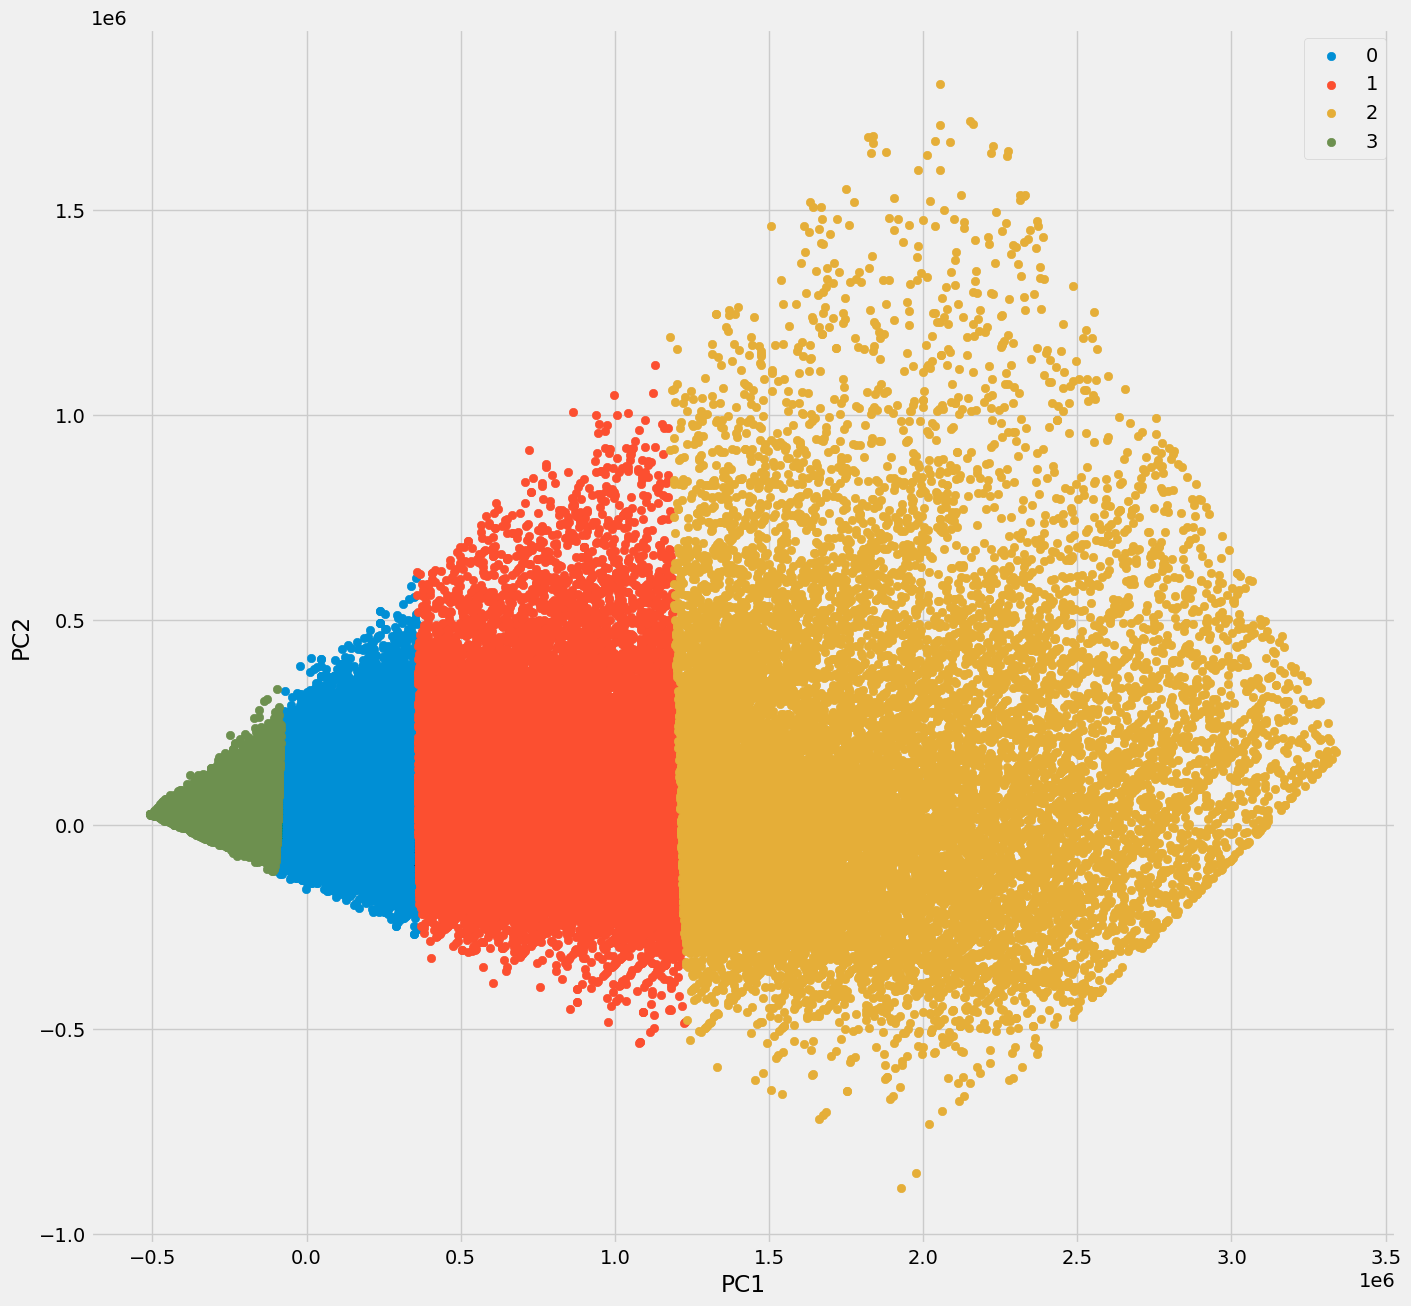

In [97]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### Plotting centroids

In [98]:
centers = np.array(model.cluster_centers_)

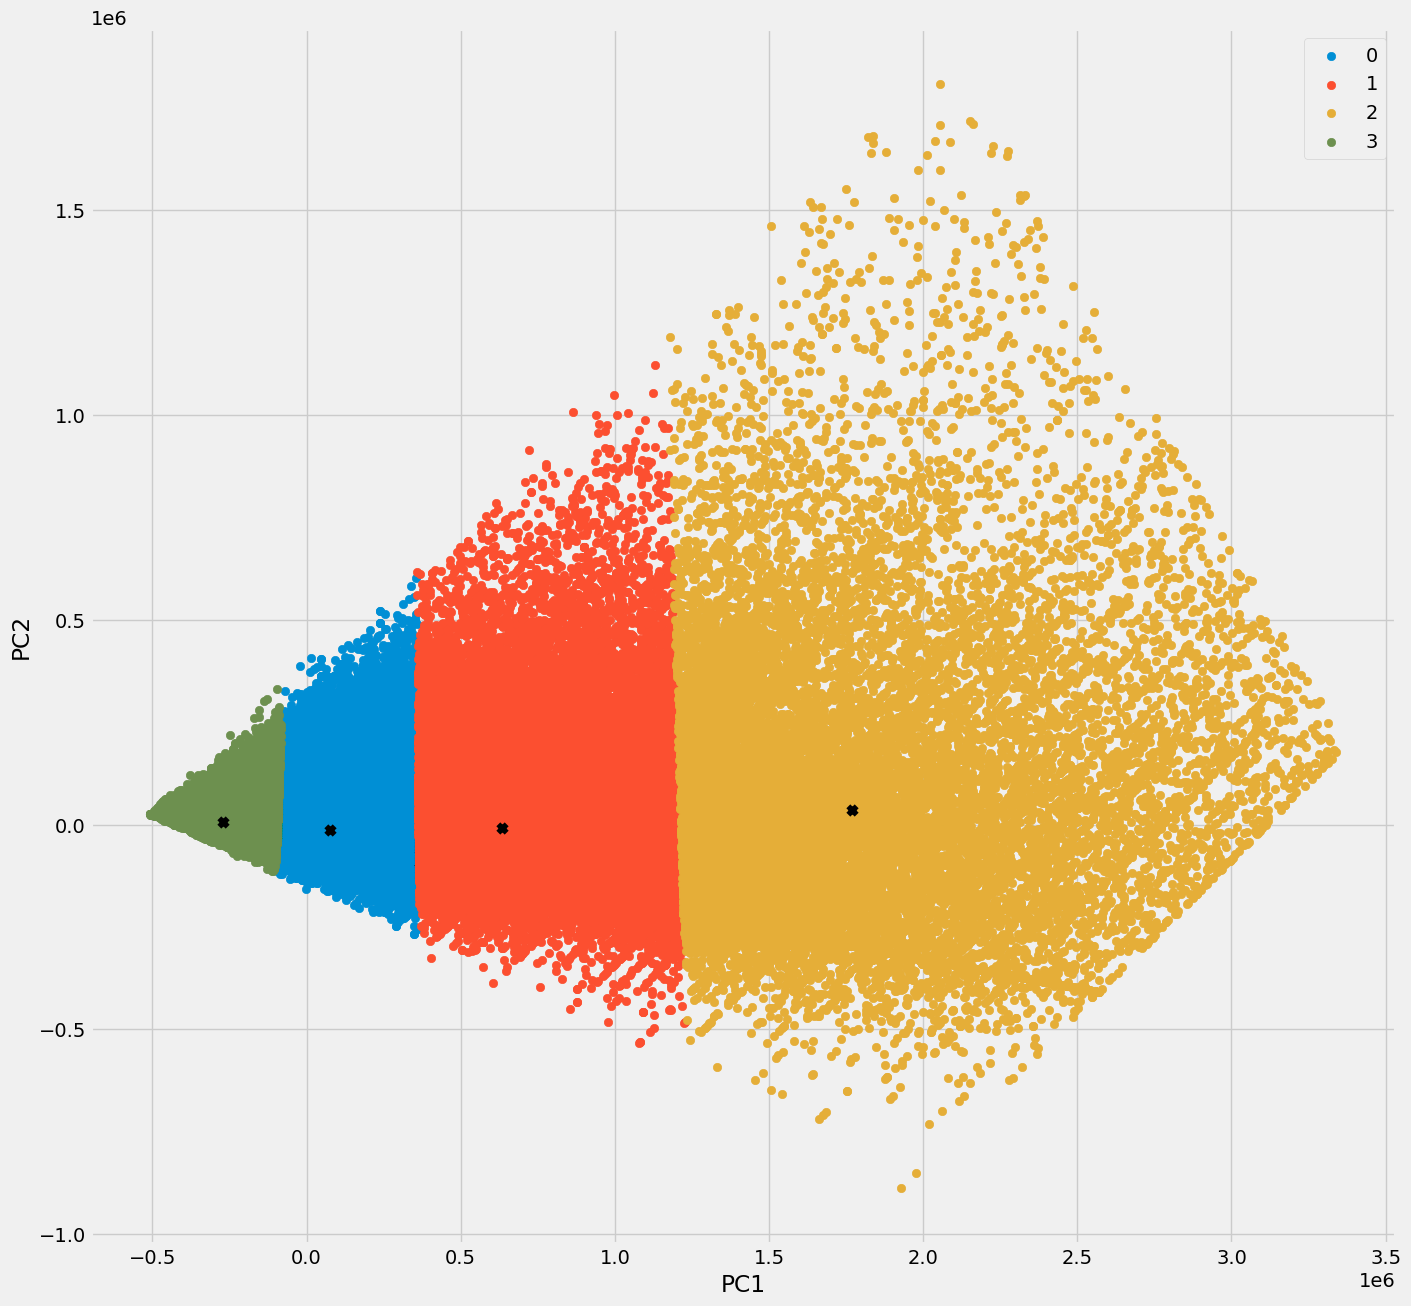

In [99]:
plt.figure(figsize=(15,15))
uniq = np.unique(label)

for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(centers[:,0], centers[:,1], marker='x', color='k')
plt.legend()
plt.show()